<a href="https://colab.research.google.com/github/Akashgola123/RNN_Scatch/blob/main/RNN_SCTACH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

**Generate synthetic time series**

In [19]:
def generate_time_series_data(num_points, time_range):
  t = np.linspace(*time_range,num_points)
  series = np.sin(t) + np.random.randn(num_points) * 0.1
  return series.astype(np.float32)


# **preper data from training**

In [20]:
def prepare_data(series, window_size):
  x = []
  y = []
  for i in range(len(series) - window_size):
    x.append(series[i:i+window_size])
    y.append(series[i+window_size])
  return torch.tensor(x).unsqueeze(-1), torch.tensor(y).unsqueeze(-1)

# **Define rnn model **

In [21]:
class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(RNN, self).__init__()
    self.rnn = nn.RNN(input_size, hidden_size, batch_first= True)
    self.fc = nn.Linear(hidden_size, output_size)

  def forward(self,x):
    out,hidden = self.rnn(x)
    out = self.fc(out[:,-1,:])
    return out

# **Generate time series data**

In [22]:
num_points = 1000
time_range = (0,20)
series = generate_time_series_data(num_points, time_range)

# **Prepare data**

In [23]:
window_size = 20
X, y = prepare_data(series, window_size)

# Define model and loss **function**

In [24]:
input_size = 1  # Single feature (time series value)


hidden_size = 50


output_size = 1


model = RNN(input_size, hidden_size, output_size)


criterion = nn.MSELoss()


optimizer = torch.optim.Adam(model.parameters(), lr=0.01)



# **Predictions**

# **train the model**

In [25]:
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [1/100], Loss: 0.6769
Epoch [11/100], Loss: 0.0425
Epoch [21/100], Loss: 0.0169
Epoch [31/100], Loss: 0.0199
Epoch [41/100], Loss: 0.0133
Epoch [51/100], Loss: 0.0140
Epoch [61/100], Loss: 0.0131
Epoch [71/100], Loss: 0.0131
Epoch [81/100], Loss: 0.0130
Epoch [91/100], Loss: 0.0130


In [26]:
with torch.no_grad():
  future = 50
  pred_series = series[:window_size].tolist() # Seed with initial values

  for _ in range(future):
    input_tensor = torch.tensor(pred_series[-window_size:]).unsqueeze(-1).unsqueeze(0)
    pred = model(input_tensor)
    pred_series.append(pred.item())


# **Plot result**

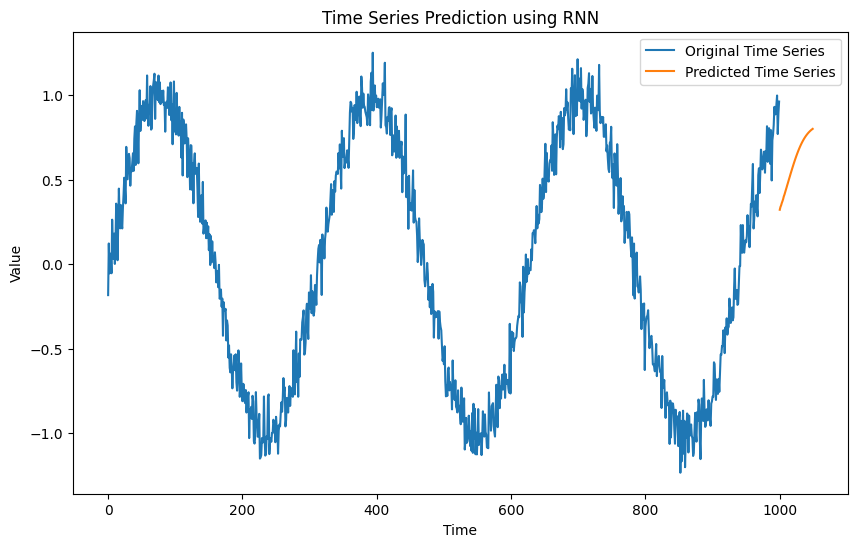

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(series, label='Original Time Series')
plt.plot(range(num_points, num_points + future), pred_series[window_size:], label='Predicted Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Prediction using RNN')
plt.legend()
plt.show()
